Epoch [500/20000], Loss: 0.3759
Epoch [1000/20000], Loss: 0.3739
Epoch [1500/20000], Loss: 0.3737
Epoch [2000/20000], Loss: 0.3725
Epoch [2500/20000], Loss: 0.3721
Epoch [3000/20000], Loss: 0.3720
Epoch [3500/20000], Loss: 0.3710
Epoch [4000/20000], Loss: 0.3708
Epoch [4500/20000], Loss: 0.3711
Epoch [5000/20000], Loss: 0.3697
Epoch [5500/20000], Loss: 0.3694
Epoch [6000/20000], Loss: 0.3692
Epoch [6500/20000], Loss: 0.2907
Epoch [7000/20000], Loss: 0.2811
Epoch [7500/20000], Loss: 0.2793
Epoch [8000/20000], Loss: 0.2773
Epoch [8500/20000], Loss: 0.2770
Epoch [9000/20000], Loss: 0.2769
Epoch [9500/20000], Loss: 0.2755
Epoch [10000/20000], Loss: 0.2751
Epoch [10500/20000], Loss: 0.2751
Epoch [11000/20000], Loss: 0.2746
Epoch [11500/20000], Loss: 0.2745
Epoch [12000/20000], Loss: 0.2744
Epoch [12500/20000], Loss: 0.2752
Epoch [13000/20000], Loss: 0.2743
Epoch [13500/20000], Loss: 0.2741
Epoch [14000/20000], Loss: 0.2744
Epoch [14500/20000], Loss: 0.2743
Epoch [15000/20000], Loss: 0.2742


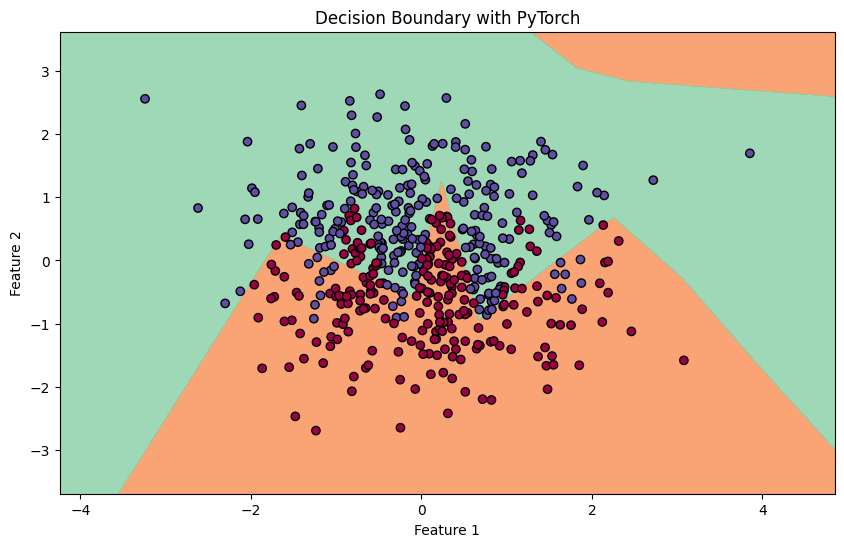

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate toy data
np.random.seed(42)
X = np.random.randn(2, 500).T  # 2 features, 500 samples
Y = (X[:, 1] > np.sin(2 * np.pi * X[:, 0])).astype(int)  # 1 if above sine wave, else 0

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1)

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, output_size)
        self.activation = nn.ReLU()
        self.output_activation = nn.Sigmoid()  # Binary classification

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.output_activation(self.layer3(x))
        return x

# Model, loss function, and optimizer
model = SimpleNN(input_size=2, hidden_size=8, output_size=1)
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
num_epochs = 20000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, Y_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 500 epochs
    if (epoch + 1) % 500 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Generate grid for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_tensor = torch.tensor(grid_points, dtype=torch.float32)

# Predict on grid
Z = model(grid_tensor).detach().numpy().reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.8, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Spectral)
plt.title("Decision Boundary with PyTorch")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
